# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import nltk
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Read Text

In [5]:
#pd.set_option('display.max_colwidth', 150)
#stopwords = nltk.corpus.stopwords.words('english')
#ps = nltk.PorterStemmer()

yelp = pd.read_csv('/content/drive/My Drive/yelp.csv')


In [6]:
import nltk
nltk.download('stopwords')
pd.set_option('display.max_colwidth', 150)
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grou...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about so...",review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I also dig their candy selection :),review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballpa...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,"General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott ...",review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


# Create two features punct % & length

In [8]:
def coun_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

yelp['punct %'] = yelp['text'].apply(lambda x: coun_punct(x))
yelp['length'] = yelp['text'].apply(lambda x: len(x) - x.count(" "))

In [9]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#yelp['tokens'] = yelp['text'].apply(lambda x: clean_text(x))


In [10]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,punct %,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grou...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,2.9,730
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about so...",review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,3.3,1090
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I also dig their candy selection :),review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,4.9,61
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballpa...",review,uZetl9T0NcROGOyFfughhg,1,2,0,5.2,345
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,"General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott ...",review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,9.9,385


In [11]:
yelp.shape

(10000, 12)

In [12]:
yelp.describe()

,stars,cool,useful,funny,punct %,length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,4.307180,578.865300
std,1.214636,2.067861,2.336647,1.907942,2.117274,503.037704
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,3.200000,240.000000
50%,4.000000,0.000000,1.000000,0.000000,4.000000,441.000000
75%,5.000000,1.000000,2.000000,1.000000,5.000000,757.000000
max,5.000000,77.000000,76.000000,57.000000,84.200000,4138.000000


# As we want to classify reviews as 1 or 5 star we take only that rows

In [13]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
X = yelp_class['text']
X.shape

(4086,)

In [14]:
y = yelp_class['stars']
y.shape

(4086,)

In [15]:
y

0       5
1       5
3       5
4       5
6       5
       ..
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64

In [16]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   business_id  4086 non-null   object 
 1   date         4086 non-null   object 
 2   review_id    4086 non-null   object 
 3   stars        4086 non-null   int64  
 4   text         4086 non-null   object 
 5   type         4086 non-null   object 
 6   user_id      4086 non-null   object 
 7   cool         4086 non-null   int64  
 8   useful       4086 non-null   int64  
 9   funny        4086 non-null   int64  
 10  punct %      4086 non-null   float64
 11  length       4086 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 415.0+ KB


# EDA

### Importing Data Visualization Library

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


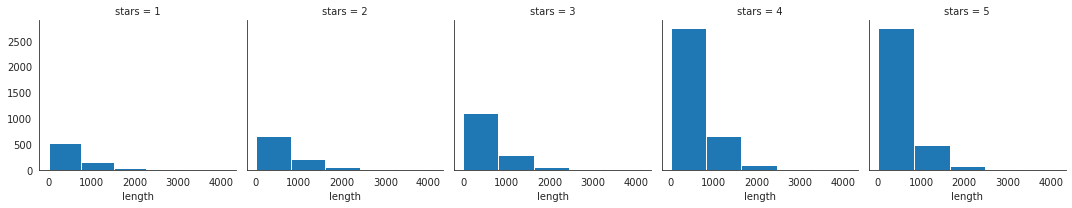

In [18]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'length',bins=5)

### Boxplot of text length for each star category.

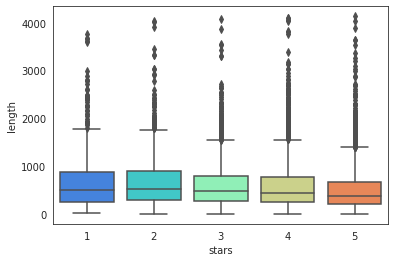

In [19]:
sns.boxplot(x='stars',y='length',data=yelp,palette='rainbow')

### Countplot of the number of occurrences for each type of star rating.

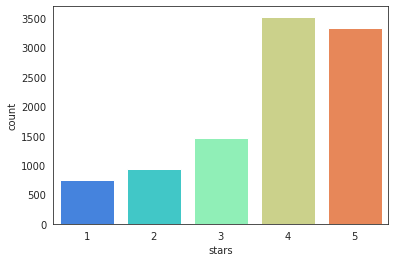

In [20]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

### Mean of numerical columns

In [21]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,punct %,length
stars,,,,,
1,0.576769,1.604806,1.056075,4.352069,671.502003
2,0.719525,1.563107,0.875944,4.216721,684.748652
3,0.788501,1.306639,0.694730,4.286995,616.454483
4,0.954623,1.395916,0.670448,4.250199,581.001702
5,0.944261,1.381780,0.608631,4.391280,509.944261


### Correlation Plot

In [22]:
stars.corr()

,cool,useful,funny,punct %,length
cool,1.000000,-0.743329,-0.944939,0.015036,-0.855608
useful,-0.743329,1.000000,0.894506,-0.082735,0.702172
funny,-0.944939,0.894506,1.000000,-0.051150,0.843221
punct %,0.015036,-0.082735,-0.051150,1.000000,-0.528166
length,-0.855608,0.702172,0.843221,-0.528166,1.000000


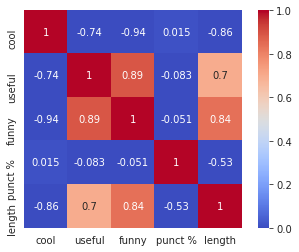

In [23]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True,vmin=0, vmax=1,square = True)

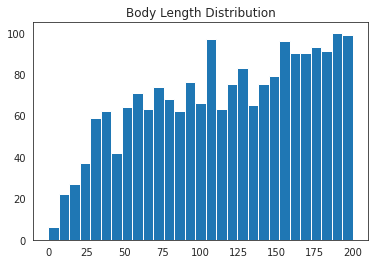

In [24]:
bins = np.linspace(0, 200, 30)

plt.hist(yelp['length'], bins)
plt.title("Body Length Distribution")
plt.show()

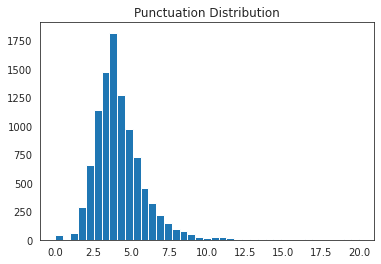

In [25]:
bins = np.linspace(0, 20, 40)

plt.hist(yelp['punct %'], bins)
plt.title("Punctuation Distribution")
plt.show()

# Apply Vectorizer to convert text to numbers

# Apply Count Vectorizer

In [26]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
X = yelp_class['text']
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(yelp_class['text'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(4086, 16106)
['', '0', '00', '01042012', '022010', '03342', '05', '050', '06', '07092008', '075', '09', '090', '095', '1', '10', '100', '1000', '10000', '1000am', '1000pm', '1000x', '1001', '100150', '1007', '100th', '101', '1011', '1012', '101412', '1015', '102', '1025', '1030', '103011', '1030pm', '10312012', '105', '1070', '108', '109', '1095', '1099', '10am', '10am4pm', '10close', '10each', '10gallon', '10ish', '10min', '10minut', '10person', '10pm', '10pm12am', '10shrimp', '10th', '10thand', '10x', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111pm', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1199', '11991079', '11a3p', '11am', '11ish', '11person', '11pm', '12', '120', '1200', '12000', '1205', '1207', '120year', '121007', '121107', '121207', '1213', '121407', '1216', '122111', '122112', 

In [27]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16066,16067,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077,16078,16079,16080,16081,16082,16083,16084,16085,16086,16087,16088,16089,16090,16091,16092,16093,16094,16095,16096,16097,16098,16099,16100,16101,16102,16103,16104,16105
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

,,0,00,01042012,022010,03342,05,050,06,07092008,075,09,090,095,1,10,100,1000,10000,1000am,1000pm,1000x,1001,100150,1007,100th,101,1011,1012,101412,1015,102,1025,1030,103011,1030pm,10312012,105,1070,108,...,zest,zesti,zexperi,zgrill,zha,zhou,zia,zichini,zilch,zillion,zin,zinburg,zinburgergeist,zinc,zinfandel,zing,zip,zipcar,ziploc,zipp,zipper,ziti,zoe,zombi,zone,zoner,zoo,zoom,zoyo,zucca,zucchini,zuccini,zuchinni,zumba,zupa,zuzu,zwiebelkräut,éclair,école,ém
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:

X_train, X_test, y_train, y_test = train_test_split(X_counts_df, y,test_size=0.3,random_state=101)

In [32]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [33]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
predictions = nb.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[166  62]
 [ 29 969]]


              precision    recall  f1-score   support

           1       0.85      0.73      0.78       228
           5       0.94      0.97      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.85      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier(n_estimators=300, max_depth=None, n_jobs=-1)

In [36]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [37]:
predictions = rf.predict(X_test)

In [38]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 98 130]
 [  2 996]]


              precision    recall  f1-score   support

           1       0.98      0.43      0.60       228
           5       0.88      1.00      0.94       998

    accuracy                           0.89      1226
   macro avg       0.93      0.71      0.77      1226
weighted avg       0.90      0.89      0.87      1226



In [39]:
gb = GradientBoostingClassifier(n_estimators=10, max_depth=None)


In [40]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=None,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Using Grid Search CV

In [41]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,25.950308,0.559500,0.218519,0.008104,None,150,"{'max_depth': None, 'n_estimators': 150}",0.879371,0.879371,0.868881,0.877622,0.882867,0.877622,0.004691,1
11,46.253845,10.778715,0.308641,0.090071,None,300,"{'max_depth': None, 'n_estimators': 300}",0.870629,0.879371,0.867133,0.875874,0.881119,0.874825,0.005256,2
8,50.126245,1.244983,0.352007,0.012225,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.875874,0.877622,0.867133,0.872378,0.872378,0.873077,0.003600,3
7,24.700222,0.300858,0.202051,0.008105,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.861888,0.879371,0.867133,0.875874,0.877622,0.872378,0.006726,4
9,2.026667,0.070327,0.076067,0.002341,None,10,"{'max_depth': None, 'n_estimators': 10}",0.844406,0.867133,0.888112,0.884615,0.865385,0.869930,0.015660,5


# Apply N-gram Vectorization


In [43]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

yelp['cleaned_text'] = yelp['text'].apply(lambda x: clean_text(x))
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,punct %,length,cleaned_text
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grou...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,2.9,730,wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur waitress excel food arriv quickli semibusi satu...
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about so...",review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,3.3,1090,idea peopl give bad review place goe show pleas everyon probabl gripe someth faultther mani peopl like case friend arriv 550 pm past sunday pretti...
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I also dig their candy selection :),review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,4.9,61,love gyro plate rice good also dig candi select
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballpa...",review,uZetl9T0NcROGOyFfughhg,1,2,0,5.2,345,rosi dakota love chaparr dog park conveni surround lot path desert xeriscap basebal field ballpark lake duck scottsdal park rec dept wonder job ke...
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,"General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott ...",review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,9.9,385,gener manag scott petello good egg go detail let assur issu albeit rare speak scott treat guy respect state case id surpris dont walk total satisf...


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(1,1))
X_counts = ngram_vect.fit_transform(yelp['cleaned_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(10000, 26985)
['00', '007', '01', '01042012', '010712', '02', '020', '022010', '03342', '039', '039oz', '04052012', '05', '050', '06', '07', '07092008', '072511', '075', '08', '09', '090', '095', '099', '10', '100', '1000', '10000', '100000', '1000am', '1000pm', '1000x', '1001', '100150', '1002', '1007', '100am', '100night', '100pm', '100th', '100yearold', '101', '1010', '10102010great', '1011', '101112', '1012', '1012glass', '1012pm', '101412', '1015', '1015ft', '101if', '102', '1024', '1025', '102729', '1030', '103011', '1030330', '1030am', '1030pm', '10312012', '1033', '104', '105', '1050', '1058', '1059', '1070', '1075', '107f', '108', '109', '1095', '1097', '1099', '10am', '10am4pm', '10bowl', '10close', '10cocktail', '10each', '10for', '10gallon', '10ish', '10k', '10mile', '10min', '10minut', '10month', '10night', '10oz', '10p', '10person', '10pm', '10pm12am', '10pm2am', '10pp', '10shrimp', '10th', '10thand', '10top', '10x', '10yard', '10yo', '11', '110', '1100', '1100am', '1103

In [45]:
X_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,26945,26946,26947,26948,26949,26950,26951,26952,26953,26954,26955,26956,26957,26958,26959,26960,26961,26962,26963,26964,26965,26966,26967,26968,26969,26970,26971,26972,26973,26974,26975,26976,26977,26978,26979,26980,26981,26982,26983,26984
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
X_counts_df.columns = ngram_vect.get_feature_names()
X_counts_df

,00,007,01,01042012,010712,02,020,022010,03342,039,039oz,04052012,05,050,06,07,07092008,072511,075,08,09,090,095,099,10,100,1000,10000,100000,1000am,1000pm,1000x,1001,100150,1002,1007,100am,100night,100pm,100th,...,ziploc,zipp,zipper,zippi,ziti,zoe,zoey,zoftik,zola,zombi,zombielik,zone,zoner,zoo,zoom,zoospac,zoya,zoyo,zpizza,zs,zteja,ztrip,zucca,zucchini,zucchinimushroom,zuccini,zuch,zuchinni,zuma,zumaroka,zumba,zupa,zur,zuzu,zweigel,zwiebelkräut,zzzzzzzzzzzzzzzzz,éclair,école,ém
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Apply TF-IDF

In [1]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(yelp_class['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

In [ ]:
X_tfidf.toarray()

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

In [ ]:

predictions = nb.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

In [ ]:
gb = GradientBoostingClassifier(n_estimators=200, max_depth=30)
gb.fit(X_train,y_train)

In [ ]:
predictions = gb.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train,y_train)

In [ ]:
predictions = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
predictions = nb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

In [ ]:
gb = GradientBoostingClassifier(n_estimators=200, max_depth=30)

In [ ]:
gb.fit(X_train,y_train)

In [ ]:
predictions = nb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yelp_class[['text', 'length','punct %']], yelp_class['stars'], test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])

tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[[ 'length','punct %']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[[ 'length','punct %']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

In [ ]:
import time
from sklearn.metrics import precision_recall_fscore_support as score
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
import time
from sklearn.metrics import precision_recall_fscore_support as score
gb = GradientBoostingClassifier(n_estimators=300, max_depth=20)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, average='binary')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

print(confusion_matrix(y_pred,y_test))